# AI Agent LangGraph Workflow Visualization

이 노트북은 AI Agent의 LangGraph 워크플로우 구조를 시각화합니다.

In [1]:

from dotenv import load_dotenv, find_dotenv

# .env 파일 로드
dotenv_path = find_dotenv()
load_dotenv(dotenv_path, override=True)

True

In [2]:
from app.agents.workflows.chat_workflow import create_chat_workflow


# 워크플로우 생성 (async 함수이므로 asyncio 사용)


async def create_workflow_for_visualization():
    """시각화용 워크플로우 생성"""
    try:
        workflow, checkpointer_context = await create_chat_workflow()

        # checkpointer 없이 컴파일 (시각화만 목적)
        app = workflow.compile()
        return app
    except Exception as e:
        print(f"Workflow creation error: {e}")
        # 에러가 발생해도 워크플로우 구조는 볼 수 있도록
        return workflow.compile()


# asyncio를 사용해 워크플로우 생성
app = await create_workflow_for_visualization()
print("✅ Workflow created successfully!")

/Users/kimjunghyeon/Desktop/workspace/ai-agent/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Workflow created successfully!


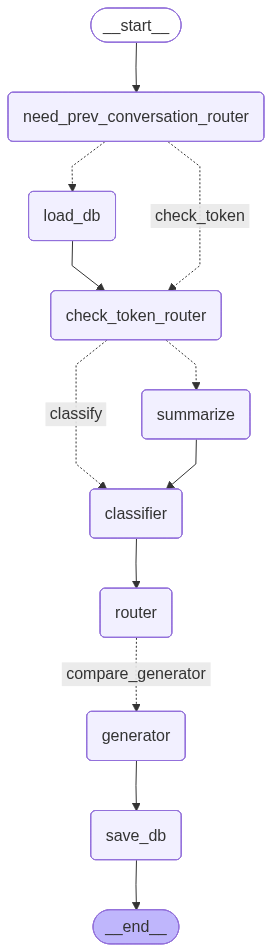

📸 Graph saved as 'workflow_graph.png'


In [3]:
# LangGraph 내장 시각화 사용
from IPython.display import Image, display

try:
    # Mermaid 다이어그램으로 워크플로우 시각화
    mermaid_png = app.get_graph().draw_mermaid_png()

    # 이미지 표시
    display(Image(mermaid_png))

    # 이미지 저장
    with open('../architecture/workflow_graph.png', 'wb') as f:
        f.write(mermaid_png)
    print("📸 Graph saved as 'workflow_graph.png'")

except Exception as e:
    print(f"Mermaid visualization error: {e}")
    print("Trying alternative visualization...")

In [4]:
# 노드와 엣지 정보 출력
graph = app.get_graph()

print("🔗 Workflow Structure Analysis")
print("=" * 50)

print("\n📋 Nodes:")
for node in graph.nodes:
    print(f"  • {node}")

print("\n🔀 Edges:")
for edge in graph.edges:
    print(f"  • {edge}")

print(f"\n🚀 Entry Point: {graph.first_node()}")
print(f"🏁 End Points: {list(graph.last_node())}")

🔗 Workflow Structure Analysis

📋 Nodes:
  • __start__
  • load_db
  • summarize
  • classifier
  • router
  • generator
  • save_db
  • need_prev_conversation_router
  • check_token_router
  • __end__

🔀 Edges:
  • Edge(source='__start__', target='need_prev_conversation_router', data=None, conditional=False)
  • Edge(source='check_token_router', target='classifier', data='classify', conditional=True)
  • Edge(source='check_token_router', target='summarize', data=None, conditional=True)
  • Edge(source='classifier', target='router', data=None, conditional=False)
  • Edge(source='generator', target='save_db', data=None, conditional=False)
  • Edge(source='load_db', target='check_token_router', data=None, conditional=False)
  • Edge(source='need_prev_conversation_router', target='check_token_router', data='check_token', conditional=True)
  • Edge(source='need_prev_conversation_router', target='load_db', data=None, conditional=True)
  • Edge(source='router', target='generator', data='compa